## 2.1 Data Preprocessing

In [1]:
# Importing Necessary Packages
import warnings
warnings.filterwarnings("ignore")

import math
import time
from datetime import date, timedelta, datetime
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

## Setting Logging

In [2]:
import logging
import logging.handlers
import os
 
handler = logging.handlers.WatchedFileHandler(
    os.environ.get("LOGFILE", "../logs/prediction.log"))
formatter = logging.Formatter(logging.BASIC_FORMAT)
handler.setFormatter(formatter)
root = logging.getLogger()
root.setLevel(os.environ.get("LOGLEVEL", "INFO"))
root.addHandler(handler)
logging.info("Testing Loggings") 
try:
    exit(main())
except Exception:
    logging.exception("Exception in main()")
    exit(1)

## Creating Dataframe Class, and object

In [3]:
# Class to load the data
class FetchData():
    def __init__(self):
        self.dfdict = {}
        self.dfdict['train'] = self.get_train_data()
        self.dfdict['test'] = self.get_test_data()
        self.dfdict['sample'] = self.get_sample_data()
        self.dfdict['store'] = self.get_store_data()
        
    def get_train_data(self,name='train'):
        filename = f'../data/{name}.csv'
        try:
            df = pd.read_csv(filename)
            logging.info(f"{name} Dataset read successfully")
            return df

        except Exception as e:
            logging.exception(f" Exception occured in reading dataset, {e}")
            return None
    
    def get_test_data(self,name='test'):
        filename = f'../data/{name}.csv'        
        try:
            df = pd.read_csv(filename)
            logging.info(f"{name} Dataset read successfully")
            return df   

        except Exception as e:
            logging.exception(f" Exception occured in reading dataset, {e}")
            return None
        
    def get_store_data(self,name='store'):
        filename = f'../data/{name}.csv'        
        try:
            df = pd.read_csv(filename)
            logging.info(f"{name} Dataset read successfully") 
            return df  

        except Exception as e:
            logging.exception(f" Exception occured in reading dataset, {e}")
            return None 
    
    def get_sample_data(self,name='sample_submission'):
        filename = f'../data/{name}.csv'        
        try:
            df = pd.read_csv(filename)
            logging.info(f"{name} Dataset read successfully")  
            return df  

        except Exception as e:
            logging.exception(f" Exception occured in reading dataset, {e}")
            return None 
    
    def show_sample_data(self,dataset='train', sample=5):
        try:
            df = dataset.head(sample)
            return df  

        except Exception as e:
            logging.exception(f" Exception occured in getting sample data of a dataset, {e}")
            return None

    def find_null_values(self,dataset='train'):
        try:
            df = dataset.isnull().sum()
            logging.info("Getting Null values, Execution successfuly")
            return df  

        except Exception as e:
            logging.exception(f" Exception in getting Null values, {e}")
            return None

    def get_start_end_date(self, dataset_name='train', date_column='Date'):
        try:
            start_date = dataset_name[date_column].min()
            end_date = dataset_name[date_column].max()
            logging.info("Getting start and End date successfully")
            return start_date, end_date

        except Exception as e:
            logging.exception(f"Exception in getting start and end date, {e}")

            return None, None

    def join_dataset(self, dataset='train', dataset1='store'):
        if dataset.Store.nunique() == dataset1.Store.nunique():
            try:
                df_combined = dataset.merge(dataset1, how='left', left_on=dataset.Store, right_on=dataset1.Store)
                df_combined.drop(['key_0', 'Store_y'], axis=1, inplace=True)
                df_combined = df_combined.rename(columns={'Store_x':'Store'})
                logging.info(f" Joining {dataset} and {dataset1} datasets successfully")

                return df_combined.shape, df_combined
            
            except Exception as e:
                logging.debug(f"Exception in Joining {dataset} and {dataset1} datasets, {e}")
                return None, None

        else:
            logging.error("The values in the dataset are not compartible")
            print("The values in the dataset are not compartible")

    def add_day_month_year_to_dataset(self, dataset, column_list = ['day','month','year']):
        try:
            dataset.Date = pd.to_datetime(dataset.Date)
            for column in column_list:
                dataset[column] = dataset.Date.dt.column
                logging.info(f"Adding {column} column to dataset successfully")
                return dataset

        except Exception as e:
            logging.exception(f"Exception occured in Adding columns in dataset, Exception:{e}")
             
            return None

In [4]:
#  Creating FetchData Object
data = FetchData()

### Loading Datasets

In [5]:
try:
    train_data = data.get_train_data("train")
    store_data = data.get_train_data("store")
    test_data = data.get_train_data("test")
    sample_submission_data = data.get_train_data("sample_submission")

except Exception as e:
    logging.exception(f"Exception occured in loading dataset, Exception:{e}")

In [6]:
print(f" Train Data with shape of: {train_data.shape}")
print(train_data.info())
print(f" Store Data with sape of {store_data.shape}")
print(store_data.info())
print(f" Test Data with sape of {test_data.shape}")
print(test_data.info())
print(f" Sample Submission with sape of {sample_submission_data.shape}")
print(sample_submission_data.info())

 Train Data with shape of: (1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
 Store Data with sape of (1115, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-n

### It can be seen that, store dataset has many missing values, and test dataset has 11 missing value

## Handling 'NA' values
###  - Store dataset

In [7]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
# Sorting the dataset by Competition Distance, because competition distance has less 'NA' values
store_data.sort_values(by='CompetitionDistance')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
515,516,a,c,20.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec"
881,882,a,a,30.0,4.0,2013.0,0,NaN,NaN,NaN
1007,1008,a,c,30.0,9.0,2010.0,0,NaN,NaN,NaN
620,621,a,a,30.0,7.0,2002.0,0,NaN,NaN,NaN
987,988,a,a,30.0,11.0,2012.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
121,122,a,c,58260.0,4.0,2013.0,0,NaN,NaN,NaN
452,453,a,c,75860.0,NaN,NaN,0,NaN,NaN,NaN
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


### Handling the CompetitionDistance 'NA' values by filling with mean

In [9]:
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.mean(),inplace=True)
# store_data.sort_values(by='CompetitionDistance')

### Dealing with 'CompetitionOpenSinceMonth, CompetitionOpenSinceYear' NA values

In [10]:
store_data[store_data['CompetitionOpenSinceYear'].isna() == True].describe()


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,354.000000,354.000000,0.0,0.0,354.000000,206.000000,206.000000
mean,560.584746,5430.634755,NaN,NaN,0.581921,25.480583,2011.567961
std,321.188639,7375.534157,NaN,NaN,0.493941,14.858261,1.638781
min,12.000000,20.000000,NaN,NaN,0.000000,1.000000,2009.000000
25%,277.500000,647.500000,NaN,NaN,0.000000,13.000000,2010.000000
50%,529.000000,2560.000000,NaN,NaN,1.000000,27.000000,2012.000000
75%,852.500000,7877.500000,NaN,NaN,1.000000,40.000000,2013.000000
max,1115.000000,75860.000000,NaN,NaN,1.000000,50.000000,2015.000000


### It can be seen that, both 'CompetitionOpenSinceMonth, CompetitionOpenSinceYear' are not-continuous data, therefore 'NA' will be filled with Mode

In [11]:
store_data.CompetitionOpenSinceMonth.fillna(store_data.CompetitionOpenSinceMonth.mode()[0],inplace=True)
store_data.CompetitionOpenSinceYear.fillna(store_data.CompetitionOpenSinceYear.mode()[0],inplace=True)
# store_data.sort_values(by='CompetitionOpenSinceYear')

### Dealing with Promotions columns

### From the above table it can be seen there is relation between Promo2 and 'Promo2SinceWeek, Promo2SinceYear, PromoInterval', when Promo2 is 0, all other promo columns are NaN
### Verifying this hypothesis

In [12]:
store_data.query('PromoInterval.isnull() & Promo2 == 0', engine='python')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN


### Therefore, replacing all 'NaN' values of promo coulumns with 0

In [13]:
store_data.Promo2SinceWeek.fillna(0, inplace=True)
store_data.Promo2SinceYear.fillna(0, inplace=True)
store_data.PromoInterval.fillna(0, inplace=True)
# store_data.query('PromoInterval ==0 & Promo2 == 0', engine='python')

In [14]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### - Handling Missing data (NaN) Train Dataset

In [15]:
test_data.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

### The Open column is not continuous, then filling the missing values with MOde method

In [16]:
test_data.Open.fillna(test_data.Open.mode()[0],inplace=True)
# test_data.sort_values(by='Open')

## Feature extraction and Generation in Train and Test Datasets
### Adding the following features,
 - weekdays
 - weekends 
 - number of days to holidays
 - Number of days after holiday
 - Beginning of month, mid month and ending of month


In [17]:
def date_features(dataset):
    dataset.Date = pd.to_datetime(dataset.Date)
    try:
        dataset['Year'] = dataset.Date.dt.year
        dataset['Month'] = dataset.Date.dt.month
        dataset['Day'] = dataset.Date.dt.day
        dataset['WeekOfYear'] = dataset.Date.dt.weekofyear
        dataset['Weekofmonth'] = dataset.Date.dt.day//7 + 1

    except Exception as e:
        print(e)
        logging.exception(f"Exception occured in extracting Features and adding to dataset, Exception:{e}")


In [18]:
date_features(train_data)
date_features(test_data)

In [19]:
# train_data.sample(5)
test_data.sample(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Weekofmonth
119,120,158,4,2015-09-17,1.0,1,0,0,2015,9,17,38,3
14840,14841,373,1,2015-08-31,1.0,1,0,1,2015,8,31,36,5
33541,33542,206,7,2015-08-09,0.0,0,0,0,2015,8,9,32,2
24302,24303,432,4,2015-08-20,1.0,1,0,1,2015,8,20,34,3
12915,12916,100,3,2015-09-02,1.0,1,0,1,2015,9,2,36,1


### Finding the holiday dates in Train dataset

In [21]:
def find_holiday(dataset):
    try:
        holiday_dates = dataset[(dataset['StateHoliday'] != '0') & (dataset['SchoolHoliday'] != '0')]
        date_list = holiday_dates.Date.dt.strftime("%y,%m,%d").unique()
        list_date = []
        for date_item in date_list:
            list_date.append(datetime.strptime(date_item, '%y,%m,%d'))

        return list_date
    except Exception as e:
        print(e)
        logging.exception(f"Exception occured in extracting days from/to holiday Features and adding to dataset, Exception:{e}")
        return None
# list_date

In [22]:
from datetime import datetime
def nearest_date(items,pivot):
    res = min(items, key=lambda sub: abs(sub - pivot))
   
    timedelta = abs(res - pivot)
   
    return timedelta.days

# items = list_date
# pivot = datetime(2014, 3, 21, 0, 0)
# print(nearest_date(items, pivot))


In [23]:
list_date = find_holiday(train_data)
list_date_test = find_holiday(test_data)
# Creating dataframe object
df, df1 = pd.DataFrame(), pd.DataFrame()

In [24]:
def days_to_from_holiday(dataset, comparison_date):
    try:

        date_list1 = dataset.Date.dt.strftime("%y,%m,%d")
        list2 = []
        for list1 in date_list1:
            list2.append(nearest_date(comparison_date, datetime.strptime(list1, '%y,%m,%d')))
        
        return list2
    except Exception as e:
        print(e)
        logging.exception(f"Exception occured in extracting days from/to holiday Features, Exception:{e}")
        return None

In [25]:
list2 = days_to_from_holiday(train_data, list_date)
list3 = days_to_from_holiday(test_data, list_date_test)

In [26]:
df = pd.DataFrame(list(zip(list2)), columns =['days'])
df1 = pd.DataFrame(list(zip(list3)), columns =['days'])
df1.head()

,days
0,33
1,33
2,33
3,33
4,33


In [27]:
# Adding days to/from holiday
def add_day_to_from_holiday(dataset, df):
    try:

        dataset['days_to_from_hol'] = df['days']
        dataset.sample(4)
        logging.info(f"Adding days_to/from holiday to {dataset} dataset, successfully")
    except Exception as e:
        print(e)
        logging.exception(f"Exception occured while adding days_to/from holiday to {dataset} dataset, Exception:{e}")

In [28]:
add_day_to_from_holiday(train_data, df)
add_day_to_from_holiday(test_data, df1)

## Merging store dataset to Train, and test dataset

In [29]:
# Joining Train and Store datasets
try:
    shape, train_store_data = data.join_dataset(train_data, store_data)
    logging.info(f"Joining store data to train and test datasets succefully")
except Exception as e:
    print(e)
    logging.exception(f"Exception occured while merging store to train and test datasets, Exception:{e}")


In [30]:
test_data = test_data.drop(columns=['Id'])
# test_data.columns

In [31]:
print(f" Shape of Combined dataset: {shape}")
# train_store_data.head(4)
train_store_data.head(4)

 Shape of Combined dataset: (1017209, 24)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,days_to_from_hol,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,57,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,57,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,57,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,57,c,c,620.0,9.0,2009.0,0,0.0,0.0,0


In [32]:
# Checking for non-numeric columns
train_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

In [33]:
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Store             41088 non-null  int64         
 1   DayOfWeek         41088 non-null  int64         
 2   Date              41088 non-null  datetime64[ns]
 3   Open              41088 non-null  float64       
 4   Promo             41088 non-null  int64         
 5   StateHoliday      41088 non-null  object        
 6   SchoolHoliday     41088 non-null  int64         
 7   Year              41088 non-null  int64         
 8   Month             41088 non-null  int64         
 9   Day               41088 non-null  int64         
 10  WeekOfYear        41088 non-null  int64         
 11  Weekofmonth       41088 non-null  int64         
 12  days_to_from_hol  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 4.1+ MB

### Converting non-numeric columns to numerical

In [34]:
# Converting all values in these columns to string
test_data['StateHoliday'] = test_data['StateHoliday'].apply(str)
train_store_data['StateHoliday'] = train_store_data['StateHoliday'].apply(str)
train_store_data['StoreType'] = train_store_data['StoreType'].apply(str)
train_store_data['Assortment'] = train_store_data['Assortment'].apply(str)
train_store_data['PromoInterval'] = train_store_data['PromoInterval'].apply(str)

In [35]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
enc = LabelEncoder()
column_list = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
try:
    for column in column_list:
        enc.fit(train_store_data[column])
        train_store_data[column] = enc.transform(train_store_data[column])
        logging.info(f"Changing non-numeric to numeric values, successfully")
except Exception as e:
    print(e)
    logging.exception(f"Exception occured while changing non-numeric to numeric values, Exception:{e}")

In [36]:
try:
    
    enc.fit(test_data['StateHoliday'])
    test_data['StateHoliday'] = enc.transform(test_data['StateHoliday'])
    logging.info(f"Changing non-numeric to numeric values, successfully")
except Exception as e:
    print(e)
    logging.exception(f"Exception occured while changing non-numeric to numeric values, Exception:{e}")

In [37]:
train_store_data.sample(4)
# test_data.sample(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,days_to_from_hol,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
263454,1068,3,2014-12-03,5782,366,1,1,0,0,2014,...,14,3,2,5010.0,9.0,2013.0,1,5.0,2013.0,2
590140,1091,7,2014-01-19,0,0,0,0,0,0,2014,...,0,0,2,9990.0,9.0,2013.0,0,0.0,0.0,0
68083,69,7,2015-05-31,0,0,0,0,0,0,2015,...,4,2,2,1130.0,9.0,2013.0,1,40.0,2011.0,2
110245,976,5,2015-04-24,5347,606,1,0,0,0,2015,...,7,0,0,4180.0,9.0,2013.0,0,0.0,0.0,0


<AxesSubplot:xlabel='Date', ylabel='Sales'>

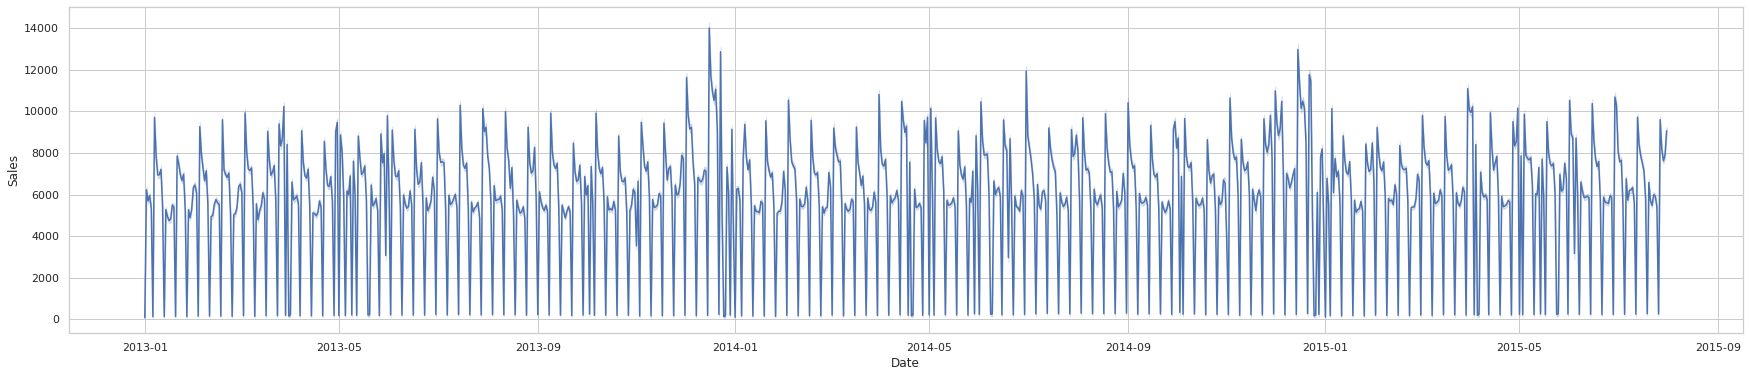

In [90]:
plt.figure(figsize=(30,6))
sns.set(style="whitegrid")
sns.lineplot(x='Date',y='Sales',data=train_store_data)

## Scaling the Train_store Dataset

In [71]:
# test_data.columns.tolist()

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = ['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
            'WeekOfYear', 'Weekofmonth', 'days_to_from_hol', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
test_column = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'Weekofmonth', 'days_to_from_hol']

temp_train_store_data = train_store_data.copy()
temp_test_data = test_data.copy()

try:
    for i in num_cols:
    
        # fit on training data column
        scale = scaler.fit(temp_train_store_data[[i]])
        
        # transform the training data column
        temp_train_store_data[i] = scale.transform(temp_train_store_data[[i]])
    
    for i in test_column:
    
        # fit on training data column
        scale = scaler.fit(temp_test_data[[i]])
        
        # transform the training data column
        temp_test_data[i] = scale.transform(temp_test_data[[i]])
        
    logging.info(f"Dataset Normalizing successfully")
except Exception as e:
    logging.debug(f"Exception occured in Normalizing the dataset, {e}")

In [39]:
temp_train_store_data.describe()
# temp_test_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,days_to_from_hol,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,4.997234e-01,1.389574e-01,8.569923e-02,8.301067e-01,3.815145e-01,1.505426e-02,1.786467e-01,4.161460e-01,4.406147e-01,...,1.870154e-01,4.024889e-01,4.675706e-01,7.133466e-02,6.170706e-01,9.570453e-01,5.005638e-01,2.329533e-01,4.997571e-01,3.267831e-01
std,3.219087e+02,3.328985e-01,9.265544e-02,6.286028e-02,3.755392e-01,4.857586e-01,9.455196e-02,3.830564e-01,3.886980e-01,3.023724e-01,...,2.094270e-01,4.551254e-01,4.969005e-01,1.015994e-01,2.526141e-01,4.644136e-02,4.999999e-01,3.064786e-01,4.991945e-01,3.606258e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,1.666667e-01,8.969700e-02,5.481862e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.818182e-01,...,3.508772e-02,0.000000e+00,0.000000e+00,9.098101e-03,4.545455e-01,9.391304e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,5.000000e-01,1.382398e-01,8.243097e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,4.545455e-01,...,1.052632e-01,0.000000e+00,0.000000e+00,3.045886e-02,7.272727e-01,9.739130e-01,1.000000e+00,2.000000e-02,9.970223e-01,3.333333e-01
75%,8.380000e+02,8.333333e-01,1.890689e-01,1.132918e-01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,6.363636e-01,...,2.631579e-01,1.000000e+00,1.000000e+00,9.045359e-02,7.272727e-01,9.826087e-01,1.000000e+00,4.400000e-01,9.985112e-01,6.666667e-01
max,1.115000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='Date', ylabel='Sales'>

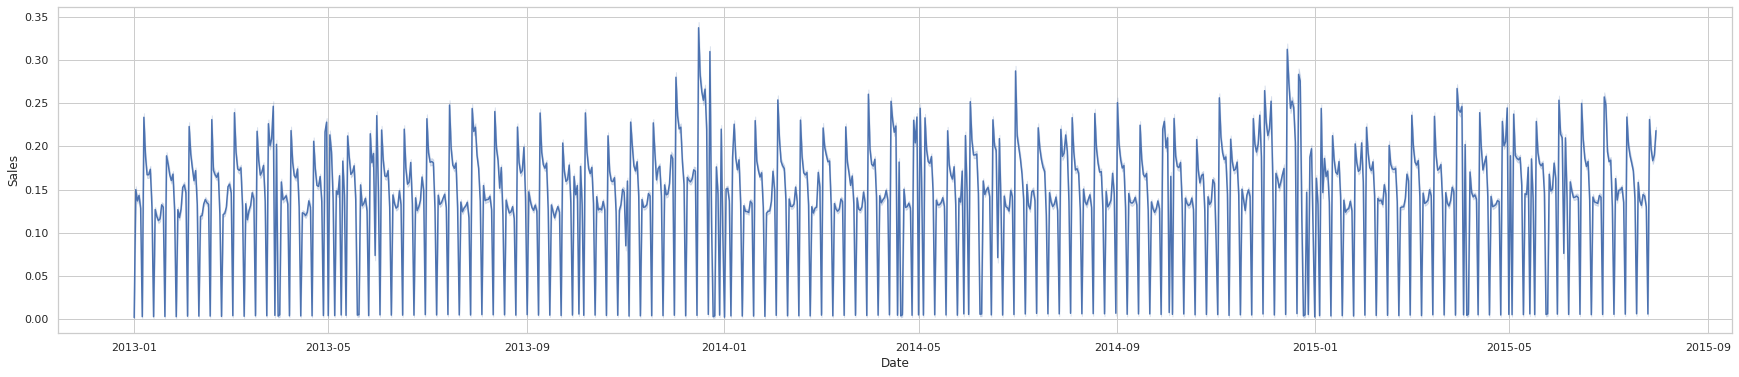

In [91]:
# Using Scaled Units
plt.figure(figsize=(30,6))
sns.set(style="whitegrid")
sns.lineplot(x='Date',y='Sales',data=temp_train_store_data)

###  The graph of Sales Vs Date for both un-scaled and Scaled data are both the same

### The Dataset has been Scaled

## 2.2 Building models with sklearn pipelines

### Using Random forests Regressor

In [53]:
y_target = temp_train_store_data.Sales
x_features =  temp_train_store_data.drop(columns=['Sales','Date','Customers'], axis=1)
# y_train

In [54]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
try: 
    x_train, x_train_test, y_train, y_train_test = train_test_split(x_features, y_target, test_size=0.20, random_state=15)

except Exception as e:
    print(e)
    logging.debug(f"Exception occured in separating dataset into x & y_training dataset, {e}")


In [55]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813767 entries, 91347 to 794056
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      813767 non-null  int64  
 1   DayOfWeek                  813767 non-null  float64
 2   Open                       813767 non-null  float64
 3   Promo                      813767 non-null  float64
 4   StateHoliday               813767 non-null  float64
 5   SchoolHoliday              813767 non-null  float64
 6   Year                       813767 non-null  float64
 7   Month                      813767 non-null  float64
 8   Day                        813767 non-null  float64
 9   WeekOfYear                 813767 non-null  float64
 10  Weekofmonth                813767 non-null  float64
 11  days_to_from_hol           813767 non-null  float64
 12  StoreType                  813767 non-null  float64
 13  Assortment               

In [57]:
y_train

91347      0.319728
38964      0.165580
670444     0.159250
1014289    0.055450
777689     0.106183
             ...   
704375     0.116243
199301     0.174075
794508     0.242040
446197     0.178431
794056     0.110130
Name: Sales, Length: 813767, dtype: float64

In [65]:
#training using cross validation set
regressor_validation=RandomForestRegressor(n_estimators=128, 
                             criterion='mse', 
                             max_depth=20, 
                             min_samples_split=10, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4, #setting n_jobs to 4 makes sure you're using the full potential of the machine you're running the training on
                             random_state=35, 
                             verbose=0, 
                             warm_start=False)
model_test=regressor_validation.fit(x_train,y_train)

### Testing the Model, to Predict

In [66]:
# temp_test_data
Y_pred = model_test.predict(x_train_test) 

(array([4.0664e+04, 7.9466e+04, 6.2780e+04, 1.4832e+04, 3.6470e+03,
        1.3710e+03, 5.1800e+02, 1.1000e+02, 4.2000e+01, 1.2000e+01]),
 array([0.        , 0.07835408, 0.15670815, 0.23506223, 0.3134163 ,
        0.39177038, 0.47012446, 0.54847853, 0.62683261, 0.70518668,
        0.78354076]),
 <BarContainer object of 10 artists>)

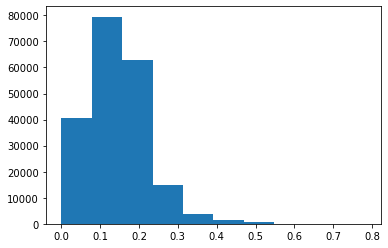

In [67]:
plt.hist(Y_pred)

### Checking for Error

In [68]:
def rmspe(y, y_pred):
    rmspe = np.sqrt(np.mean( (y - y_pred)**2 ))
    return rmspe

error=rmspe(y_train_test,Y_pred)
error

0.02539177332614845

### 0.025 (2.5%)is good enough to be sure about the prediction of the Model

## 2.3 Loss function

## 2.4 Post Prediction Feature Importance/Contribution

In [70]:
import itertools
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

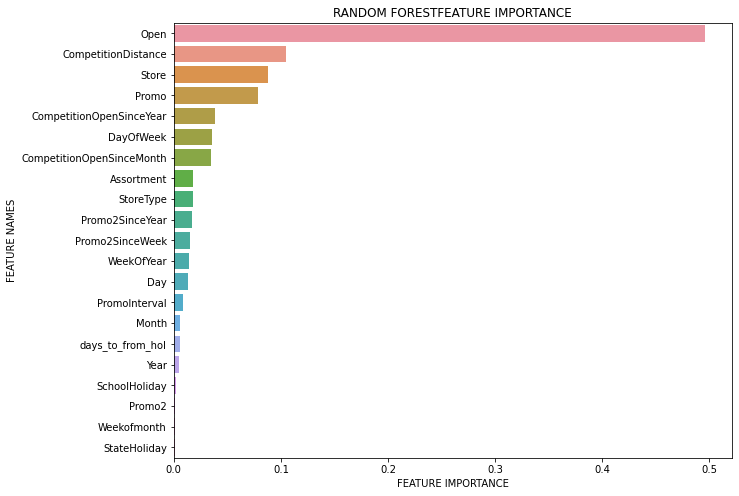

In [71]:
plot_feature_importance(regressor_validation.feature_importances_,x_train.columns,'RANDOM FOREST')

### A brief summary of the top important features in explaining store Sales;

Open: This feature contributes alot in Sales, its effect can also be seen in EDA notebook. This explains what happens to Sales when the store is Open/Closed

Competitor Distance: This also impacts a lot the sales of a store, the greater the Competitors distance the Higher the sales and vice-versa,

Store: The Store itself represents a unique identificator for the algorithm to recognise which store has what attributes and indeed better accounts for the forecasting of those same stores in a future timeline.

Promo: Promotion contributes to Sales, as also seen in EDA notebook, with promotion, which means, price reduction which in turn attracts more customers



## 2.3 Loss function

## 2.4 Post Prediction analysis